#### Importing the libraries 

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

pd.set_option('display.max_columns',None)

#### Reading the dataset

In [3]:
market_data = pd.read_excel(r"C:\Users\DELL\Desktop\Classical ML\Classical ML Datasets\Apartments_Data.xlsx")
display(market_data.head())

display(market_data.shape)

display(market_data.columns)

,gross_area,year,floor,bathrooms,bedrooms,distance_center,type_properties,elevator,parking,furnished,balcony,mortgage,status,address,comments,lat,lon,dist_high_school,dist_schools,dist_gardens,dist_hospital_qsut,orientation,storehouse,parquet,surveillance_system,air_conditioner,chimney,natural_light,termoizolation,capot_system,acoustic,façade,solar_panel,price,price/m2,Area
0,110.0,1998,1,1,2,1.153524,2+1,0,0,1,1,1,pallat I vjeter,"Sheshi Willson - Rruga ""Zef Jubani"" - Tirana e...","Shitet Apartament 21 te Sheshi Willson, Rruga ...",41.318484,19.814526,0.860951,0.195642,0.171341,3.003211,juglindje,0,0,0,0,0,0,0,0,0,0,0,170000.0,1545.454545,Urbane
1,160.0,2000,1,2,3,0.602764,3+1,0,0,0,0,0,pallat I vjeter,"Myslym Shyri - Myslym Shyri - Myslym Shyri, Sh...",nan-nan,41.324711,19.812847,0.271441,0.229660,0.267292,2.557223,lindjeperendim,0,0,0,0,0,0,0,0,0,0,0,224000.0,1400.000000,Urbane
2,126.5,2021,2,1,2,2.826610,2+1,1,1,1,1,1,pallat I ri,"Liqeni i Thate - Liqeni i Thatë, Shqipëri",Apartament ne shitje 21 super i investuar me s...,41.303166,19.815420,2.190312,0.918966,1.278491,4.489003,jugperendim,0,1,0,1,0,1,0,0,0,0,0,195000.0,1541.501976,Urbane
3,130.5,2021,2,2,2,2.654463,2+2,1,1,0,1,1,I PaPerfunduar,"Rruga e Dafinave - Fusha e Aviacionit, Shqipëri",Ofrohet per shitje apartament 212 tek ish Fush...,41.335320,19.787532,0.529620,0.007115,0.061987,3.982827,lindjeperendim,0,0,0,0,0,0,0,0,0,1,0,156000.0,1195.402299,Urbane
4,131.7,2021,2,2,2,2.654463,2+2,1,1,0,1,1,I PaPerfunduar,"Rruga e Dafinave - Fusha e Aviacionit, Shqipëri",Ofrohet per shitje apartament 212 tek ish Fush...,41.335320,19.787532,0.529620,0.007115,0.061987,3.982827,juglindje,0,0,0,0,0,0,0,0,0,1,0,159000.0,1207.289294,Urbane


(3840, 36)

Index(['gross_area', 'year', 'floor', 'bathrooms', 'bedrooms',
       'distance_center', 'type_properties', 'elevator', 'parking',
       'furnished', 'balcony', 'mortgage', 'status', 'address', 'comments',
       'lat', 'lon', 'dist_high_school', 'dist_schools', 'dist_gardens',
       'dist_hospital_qsut', 'orientation', 'storehouse', 'parquet',
       'surveillance_system', 'air_conditioner', 'chimney', 'natural_light',
       'termoizolation', 'capot_system', 'acoustic', 'façade', 'solar_panel',
       'price', 'price/m2', 'Area'],
      dtype='object')

In [4]:
#'gross_area','year','bedrooms','floor','bathrooms','elevator', 'parking',
#'furnished', 'balcony', 'mortgage','distance_center'

market_data.dtypes

gross_area             float64
year                     int64
floor                    int64
bathrooms                int64
bedrooms                 int64
distance_center        float64
type_properties         object
elevator                 int64
parking                  int64
furnished                int64
balcony                  int64
mortgage                 int64
status                  object
address                 object
comments                object
lat                    float64
lon                    float64
dist_high_school       float64
dist_schools           float64
dist_gardens           float64
dist_hospital_qsut     float64
orientation             object
storehouse               int64
parquet                  int64
surveillance_system      int64
air_conditioner          int64
chimney                  int64
natural_light            int64
termoizolation           int64
capot_system             int64
acoustic                 int64
façade                   int64
solar_pa

In [6]:
market_data.columns

Index(['gross_area', 'year', 'floor', 'bathrooms', 'bedrooms',
       'distance_center', 'type_properties', 'elevator', 'parking',
       'furnished', 'balcony', 'mortgage', 'status', 'address', 'comments',
       'lat', 'lon', 'dist_high_school', 'dist_schools', 'dist_gardens',
       'dist_hospital_qsut', 'orientation', 'storehouse', 'parquet',
       'surveillance_system', 'air_conditioner', 'chimney', 'natural_light',
       'termoizolation', 'capot_system', 'acoustic', 'façade', 'solar_panel',
       'price', 'price/m2', 'Area'],
      dtype='object')

#### Subset Dataframe:

In [7]:
data=market_data[['gross_area','year','bedrooms','floor','bathrooms','elevator', 'parking',
       'furnished', 'balcony', 'mortgage', 'status','distance_center','Area']]


con_feats=['gross_area','year','bedrooms','floor','bathrooms','elevator', 'parking',
       'furnished', 'balcony', 'mortgage','distance_center']

cate_feat=[ 'status','Area']

In [8]:
df_int = market_data[con_feats]
df_int

,gross_area,year,bedrooms,floor,bathrooms,elevator,parking,furnished,balcony,mortgage,distance_center
0,110.0,1998,2,1,1,0,0,1,1,1,1.153524
1,160.0,2000,3,1,2,0,0,0,0,0,0.602764
2,126.5,2021,2,2,1,1,1,1,1,1,2.826610
3,130.5,2021,2,2,2,1,1,0,1,1,2.654463
4,131.7,2021,2,2,2,1,1,0,1,1,2.654463
...,...,...,...,...,...,...,...,...,...,...,...
3835,93.0,1977,2,5,1,0,0,0,1,0,1.393461
3836,139.0,2007,2,3,2,0,0,1,1,1,1.403701
3837,135.0,1977,3,4,2,0,0,1,1,1,3.189933
3838,76.0,2006,1,7,1,0,0,0,1,0,2.918864


### Standartization

In [9]:
scaler = StandardScaler().fit(df_int)#scaler is an object
np_int = scaler.transform(df_int)

df_int_stand = pd.DataFrame(np_int, columns=df_int.columns)
df_int_stand

,gross_area,year,bedrooms,floor,bathrooms,elevator,parking,furnished,balcony,mortgage,distance_center
0,0.157257,-0.293283,0.152578,-1.314513,-0.831323,-0.870771,-0.506908,1.670545,0.666855,0.896946,-0.770865
1,1.423093,-0.173001,1.554255,-1.314513,1.057600,-0.870771,-0.506908,-0.598607,-1.499577,-1.114895,-1.143068
2,0.574983,1.089970,0.152578,-0.915767,-0.831323,1.148408,1.972744,1.670545,0.666855,0.896946,0.359805
3,0.676250,1.089970,0.152578,-0.915767,1.057600,1.148408,1.972744,-0.598607,0.666855,0.896946,0.243469
4,0.706630,1.089970,0.152578,-0.915767,1.057600,1.148408,1.972744,-0.598607,0.666855,0.896946,0.243469
...,...,...,...,...,...,...,...,...,...,...,...
3835,-0.273128,-1.556254,0.152578,0.280472,-0.831323,-0.870771,-0.506908,-0.598607,0.666855,-1.114895,-0.608716
3836,0.891442,0.247989,0.152578,-0.517020,1.057600,-0.870771,-0.506908,1.670545,0.666855,0.896946,-0.601795
3837,0.790175,-1.556254,1.554255,-0.118274,1.057600,-0.870771,-0.506908,1.670545,0.666855,0.896946,0.605339
3838,-0.703512,0.187848,-1.249098,1.077965,-0.831323,-0.870771,-0.506908,-0.598607,0.666855,-1.114895,0.422150


### Elbow Method:

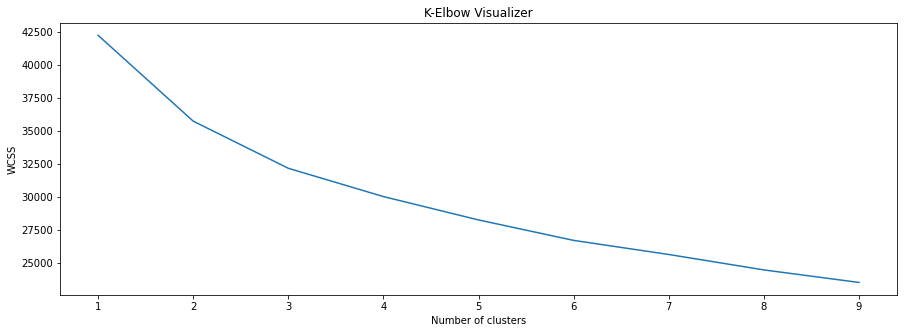

In [10]:
plt.figure(figsize=(15,5))

wcss = []

n_clusters = 10

for i in range(1,n_clusters):
    kmeans = KMeans(n_clusters=i, init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(df_int_stand)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'

plt.plot(range(1,n_clusters),wcss)
plt.title('K-Elbow Visualizer')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')#WITHIN CLUSTER SUM OF SQUARES
plt.show()



### SILHOUTE SCORE:

In [9]:
#SILHOUTE SCORE


sil_scores = []
kmeans = KMeans(n_clusters=2, init='k-means++',max_iter=50,n_init=5,random_state=0)
kmeans.fit(df_int_stand)
labels = kmeans.predict(df_int_stand)
silhoute_score = sil_scores.append(silhouette_score(df_int_stand,labels))
sil_scores

[0.1527703633595106]

### DAVIES BOULDING SCORE:

In [10]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(df_int_stand, labels)

2.266951437641821

### Labels

In [11]:
kmeans = KMeans(n_clusters = 2, init="k-means++", max_iter = 300, random_state = 0)
kmeans.fit_predict(df_int_stand)
cluster_labels = kmeans.labels_ 


market_Clusters = pd.DataFrame(cluster_labels, columns= ['CLUSTER'])
market_Clusters = market_Clusters.reset_index(drop=True)
market_Clusters

,CLUSTER
0,0
1,1
2,1
3,1
4,1
...,...
3835,0
3836,1
3837,1
3838,0


In [12]:
df_init_reset = df_int.reset_index(drop=True)
cluster_df = market_Clusters.join(df_init_reset)
cluster_df

,CLUSTER,gross_area,year,bedrooms,floor,bathrooms,elevator,parking,furnished,balcony,mortgage,distance_center
0,0,110.0,1998,2,1,1,0,0,1,1,1,1.153524
1,1,160.0,2000,3,1,2,0,0,0,0,0,0.602764
2,1,126.5,2021,2,2,1,1,1,1,1,1,2.826610
3,1,130.5,2021,2,2,2,1,1,0,1,1,2.654463
4,1,131.7,2021,2,2,2,1,1,0,1,1,2.654463
...,...,...,...,...,...,...,...,...,...,...,...,...
3835,0,93.0,1977,2,5,1,0,0,0,1,0,1.393461
3836,1,139.0,2007,2,3,2,0,0,1,1,1,1.403701
3837,1,135.0,1977,3,4,2,0,0,1,1,1,3.189933
3838,0,76.0,2006,1,7,1,0,0,0,1,0,2.918864


[Text(0.5, 1.0, 'Cluster--Elevator')]

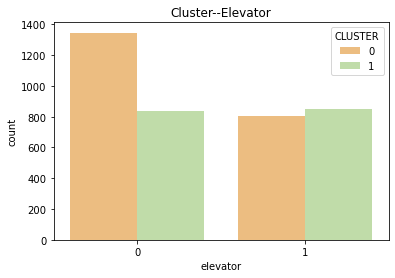

In [13]:
sns.countplot(data = cluster_df, x="elevator", hue = "CLUSTER", palette = 'Spectral' ).set(title='Cluster--Elevator')

[Text(0.5, 1.0, 'Cluster--Elevator')]

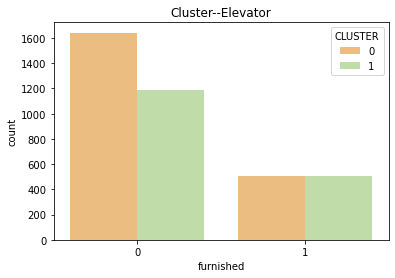

In [14]:
sns.countplot(data = cluster_df, x="furnished", hue = "CLUSTER", palette = 'Spectral' ).set(title='Cluster--Elevator')

In [15]:
cluster_df.groupby('CLUSTER').count()

,gross_area,year,bedrooms,floor,bathrooms,elevator,parking,furnished,balcony,mortgage,distance_center
CLUSTER,,,,,,,,,,,
0,2150,2150,2150,2150,2150,2150,2150,2150,2150,2150,2150
1,1690,1690,1690,1690,1690,1690,1690,1690,1690,1690,1690


In [16]:
cluster_df.groupby('CLUSTER').mean()

,gross_area,year,bedrooms,floor,bathrooms,elevator,parking,furnished,balcony,mortgage,distance_center
CLUSTER,,,,,,,,,,,
0,82.305042,2001.826047,1.497209,4.095349,1.006977,0.373953,0.168372,0.236279,0.625581,0.526047,2.380038
1,131.119355,2004.213018,2.392308,4.552663,1.991124,0.504142,0.250296,0.298817,0.776923,0.589941,2.184988


In [17]:
clusters_0 = cluster_df.loc[cluster_df['CLUSTER']==0]
clusters_0.shape

(2150, 12)

In [18]:
clusters_1 = cluster_df.loc[cluster_df['CLUSTER']==1]
clusters_1.shape

(1690, 12)

In [ ]:
clusters_0.to_csv(r"C:\Users\DELL\Downloads\clusters0.csv")

### KMedoids Implementation

In [12]:
from sklearn_extra.cluster import KMedoids

#! pip install scikit-learn-extra

In [13]:

market_data = pd.read_excel(r"C:\Users\DELL\Desktop\SDA\SDA-CLUSTERS\DAY_1\Apartments_Data.xlsx")

In [14]:
feats = ['gross_area', 'year','distance_center','price/m2']

df = market_data[feats]
df

,gross_area,year,distance_center,price/m2
0,110.0,1998,1.153524,1545.454545
1,160.0,2000,0.602764,1400.000000
2,126.5,2021,2.826610,1541.501976
3,130.5,2021,2.654463,1195.402299
4,131.7,2021,2.654463,1207.289294
...,...,...,...,...
3835,93.0,1977,1.393461,1451.612903
3836,139.0,2007,1.403701,1712.230216
3837,135.0,1977,3.189933,888.888889
3838,76.0,2006,2.918864,900.000000


In [15]:
scaler = StandardScaler().fit(df)
np_int = scaler.transform(df)

df_int_stand = pd.DataFrame(np_int, columns=df.columns)
df_int_stand

,gross_area,year,distance_center,price/m2
0,0.157257,-0.293283,-0.770865,0.891232
1,1.423093,-0.173001,-1.143068,0.567442
2,0.574983,1.089970,0.359805,0.882433
3,0.676250,1.089970,0.243469,0.111997
4,0.706630,1.089970,0.243469,0.138458
...,...,...,...,...
3835,-0.273128,-1.556254,-0.608716,0.682335
3836,0.891442,0.247989,-0.601795,1.262483
3837,0.790175,-1.556254,0.605339,-0.570317
3838,-0.703512,0.187848,0.422150,-0.545583


In [20]:
#SILHOUTE SCORE

sil_scores = []
kmedoids = KMedoids(n_clusters = 2, max_iter = 300, random_state = 0)
kmedoids.fit(df_int_stand)
labels = kmedoids.labels_ 
silhoute_score = sil_scores.append(silhouette_score(df_int_stand,labels))
sil_scores

[0.17191909637986427]

In [17]:
#LABELS
kmedoids = KMedoids(n_clusters = 2, max_iter = 300, random_state = 0)
kmedoids.fit(df_int_stand)
cluster_labels = kmedoids.labels_ 
cluster_labels


array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [18]:
market_Clusters = pd.DataFrame(cluster_labels, columns= ['CLUSTER'])
market_Clusters = market_Clusters.reset_index(drop=True)
market_Clusters

,CLUSTER
0,1
1,1
2,1
3,1
4,1
...,...
3835,0
3836,1
3837,0
3838,0


In [19]:
df_reset = df.reset_index(drop=True)
cluster_df = market_Clusters.join(df_reset)
cluster_df

,CLUSTER,gross_area,year,distance_center,price/m2
0,1,110.0,1998,1.153524,1545.454545
1,1,160.0,2000,0.602764,1400.000000
2,1,126.5,2021,2.826610,1541.501976
3,1,130.5,2021,2.654463,1195.402299
4,1,131.7,2021,2.654463,1207.289294
...,...,...,...,...,...
3835,0,93.0,1977,1.393461,1451.612903
3836,1,139.0,2007,1.403701,1712.230216
3837,0,135.0,1977,3.189933,888.888889
3838,0,76.0,2006,2.918864,900.000000
